In [1]:
%matplotlib inline

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.datasets import mnist


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout

from tensorflow.keras.callbacks import TensorBoard

# Deep Models in TensorFlow
## Live Demos

In [39]:
(attributes_train, labels_train), (attributes_test, labels_test) = mnist.load_data()

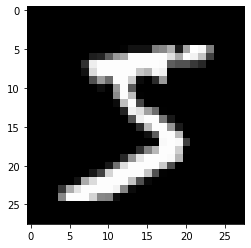

In [12]:
plt.imshow(attributes_train[0], cmap = "gray")

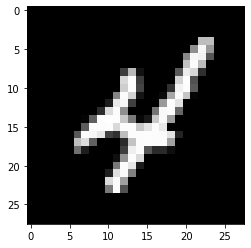

In [16]:
for i in range(10):
    plt.imshow(attributes_train[i], cmap = "gray")

In [15]:
set(labels_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [19]:
attributes_train = attributes_train / 255.0
attributes_test = attributes_test / 255.0

In [40]:
attributes_validation, labels_validation = attributes_test[:5000], labels_test[:5000]
attributes_test, labels_test = attributes_test[5000:], labels_test[5000:]

In [33]:
tf.keras.backend.clear_session()

In [34]:
model = Sequential([
    Input(shape = (28, 28)),
    Flatten(),
    
    Dense(64, activation = "relu"),
    Dropout(0.1),
    Dense(32, activation = "relu"),
    Dropout(0.1),
    Dense(16, activation = "relu"),
    Dropout(0.1),
    
    Dense(10, activation = "softmax")
])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0

In [36]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"],
)

In [44]:
model.fit(
    attributes_train, 
    labels_train, 
    validation_data =  (attributes_validation, labels_validation),
    epochs = 50, 
    callbacks = [TensorBoard(log_dir="./logs_nn")]
)

Epoch 1/50
1875/1875 [==============================] - 2s 1ms/step - loss: 3.1335 - accuracy: 0.9536 - val_loss: 2.5630 - val_accuracy: 0.9458
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6162 - accuracy: 0.9403 - val_loss: 1.5271 - val_accuracy: 0.9456
Epoch 3/50
1875/1875 [==============================] - 2s 956us/step - loss: 0.4218 - accuracy: 0.9317 - val_loss: 0.7592 - val_accuracy: 0.9444
Epoch 4/50
1875/1875 [==============================] - 2s 954us/step - loss: 0.3542 - accuracy: 0.9296 - val_loss: 0.6723 - val_accuracy: 0.9438
Epoch 5/50
1875/1875 [==============================] - 2s 941us/step - loss: 0.2811 - accuracy: 0.9402 - val_loss: 0.6133 - val_accuracy: 0.9502
Epoch 6/50
1875/1875 [==============================] - 2s 937us/step - loss: 0.2442 - accuracy: 0.9454 - val_loss: 0.4646 - val_accuracy: 0.9508
Epoch 7/50
1875/1875 [==============================] - 2s 943us/step - loss: 0.2044 - accuracy: 0.9497 - val_loss: 0.6360 - val

In [45]:
model.layers[1].weights

[<tf.Variable 'dense/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[-6.6472679e-02,  4.1599058e-02,  2.9495664e-02, ...,
          6.2868215e-02, -5.0180357e-02,  7.2930254e-02],
        [-3.8812011e-03,  7.1064599e-02, -5.4180771e-03, ...,
         -8.3072096e-02, -9.7564086e-03,  7.4834697e-02],
        [ 6.6312559e-02, -6.9871604e-02,  5.7483986e-03, ...,
          4.0544920e-02,  1.9304745e-02,  7.6087259e-02],
        ...,
        [-6.8434551e-03,  4.1538261e-02,  6.2667288e-02, ...,
         -6.4177245e-02, -5.0782923e-02, -2.1733340e-02],
        [-5.7339668e-05, -5.6634024e-02, -3.4902629e-02, ...,
          6.1912246e-02,  7.0623942e-02,  3.8894333e-02],
        [ 3.2181039e-02,  1.0002822e-02,  6.4094506e-02, ...,
         -1.0397077e-02,  7.7408873e-02,  3.0927591e-02]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(64,) dtype=float32, numpy=
 array([-0.91231906, -0.88017434, -0.7368661 ,  0.26581812, -0.12428709,
        -0.4820173 , -1.195518  ,  0.5673713